In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [18]:
health_df = pd.read_csv("../InputData/GamingStudy_data.csv", encoding="latin1")
health_df.columns

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

In [19]:
cleaned_health_df = health_df.loc[: , ['Game', 'Hours', 'Narcissism', 'Gender', 'Age',
                                      'Work', 'Degree', 'Residence', 'GAD_T', 'SWL_T', 'SPIN_T']] 
cleaned_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Game        13464 non-null  object 
 1   Hours       13434 non-null  float64
 2   Narcissism  13441 non-null  float64
 3   Gender      13464 non-null  object 
 4   Age         13464 non-null  int64  
 5   Work        13426 non-null  object 
 6   Degree      13464 non-null  object 
 7   Residence   13464 non-null  object 
 8   GAD_T       13464 non-null  int64  
 9   SWL_T       13464 non-null  int64  
 10  SPIN_T      12814 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ MB


In [27]:
cleaned_health_df = cleaned_health_df.dropna(how='any')
cleaned_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12744 entries, 0 to 13463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Game        12744 non-null  object 
 1   Hours       12744 non-null  float64
 2   Narcissism  12744 non-null  float64
 3   Gender      12744 non-null  object 
 4   Age         12744 non-null  int64  
 5   Work        12744 non-null  object 
 6   Degree      12744 non-null  object 
 7   Residence   12744 non-null  object 
 8   GAD_T       12744 non-null  int64  
 9   SWL_T       12744 non-null  int64  
 10  SPIN_T      12744 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.2+ MB


In [ ]:
cleaned_health_gender_ratio_df = cleaned_health_df["Gender"].value_counts()
cleaned_health_gender_ratio_df

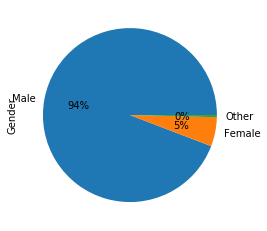

In [21]:
cleaned_health_gender_ratio_df.plot(kind="pie", autopct="%1.00f%%")
plt.show()

## Conclusion: 
### Based on the above pie chart it is evident that the gaming is a male dominated field

In [22]:
mental_illness_in_male_df = cleaned_health_df.loc[(cleaned_health_df['Gender'] == "Male"), ['Age', 'Narcissism', 'GAD_T', 'SWL_T', 'SPIN_T']]
mental_illness_in_male_df = mental_illness_in_male_df.groupby("Age").mean()
mental_illness_in_male_df

,Narcissism,GAD_T,SWL_T,SPIN_T
Age,,,,
18,2.054307,5.203184,20.420100,21.114856
19,2.088718,4.998462,19.797436,20.430256
20,2.065494,5.110370,19.379018,19.058217
21,2.018755,5.265566,19.593398,19.381845
22,2.009027,5.191575,19.300903,18.923771
23,1.959948,5.031008,19.519380,17.673127
24,2.183673,4.744898,19.392857,16.945578
25,1.995671,4.593074,19.435065,16.718615
26,1.960133,4.614618,19.023256,16.727575


In [23]:
mental_illness_in_female_df = cleaned_health_df.loc[(cleaned_health_df['Gender'] == "Female"), ['Age', 'Narcissism', 'GAD_T', 'SWL_T', 'SPIN_T']]
mental_illness_in_female_df = mental_illness_in_female_df.groupby('Age').mean()
mental_illness_in_female_df

,Narcissism,GAD_T,SWL_T,SPIN_T
Age,,,,
18,1.923664,9.335878,18.351145,31.320611
19,1.827586,6.758621,18.528736,26.068966
20,1.734043,8.276596,18.308511,29.117021
21,1.855556,7.733333,17.800000,30.011111
22,1.658228,8.012658,20.088608,29.696203
23,1.909091,6.963636,18.763636,29.090909
24,1.948718,4.641026,20.769231,24.410256
25,1.900000,7.450000,18.050000,26.100000
26,1.578947,6.578947,21.315789,23.368421


In [24]:
# Generic Function to calculate regression and plot graph
def calculate_regression_plot_graph(x_series, y_series, x_pos, y_pos):
    plt.figure(figsize=(9,7))
    plt.scatter(x=x_series, y=y_series, s=80)
    plt.xlabel(x_series.name, fontdict={"size":14})
    plt.ylabel(y_series.name, fontdict={"size":14})
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_series, y_series)
    #print(f"The r-value is: {pe_r**2}")
    pe_fit = pe_slope * x_series + pe_int
    plt.plot(x_series,pe_fit,"-",color="r")
    plt.text(x_pos, y_pos, f'y = {pe_slope:.2f}x + {pe_int:.2f}', fontsize=20, color='r')
    plt.show()

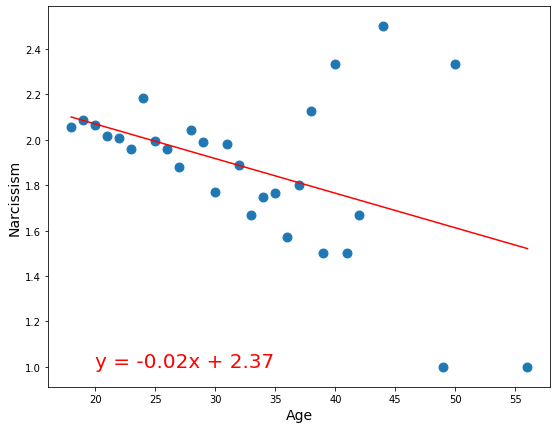

In [9]:
# Narcissism in Male 
male_age_series = mental_illness_in_male_df.index
male_nar_series = mental_illness_in_male_df["Narcissism"]
calculate_regression_plot_graph(male_age_series, male_nar_series, 20, 1.0)

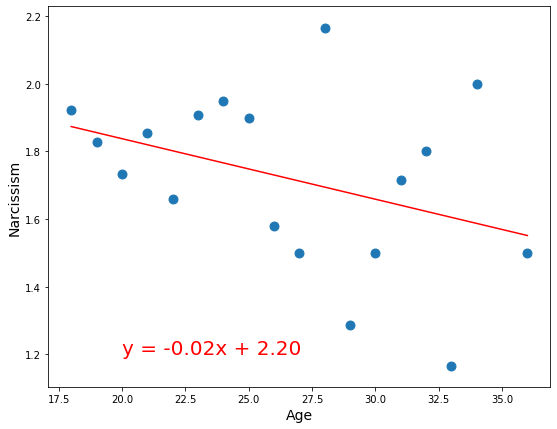

In [25]:
# Narcissism in Female 
female_age_series = mental_illness_in_female_df.index
female_nar_series = mental_illness_in_female_df["Narcissism"]
calculate_regression_plot_graph(female_age_series, female_nar_series, 20, 1.2)

## Conclusion:
### Based on the above scatter chart it is evident that Narcissism generally declines with age in Male and Female

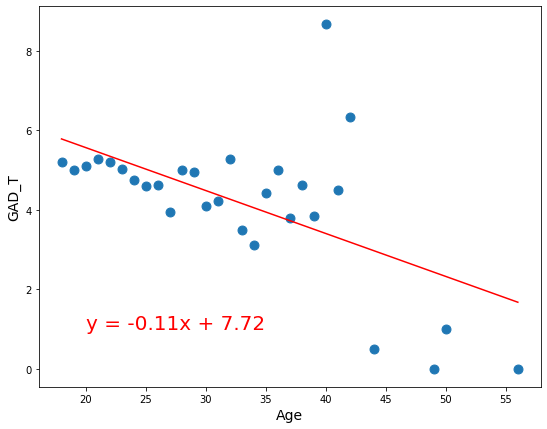

In [11]:
# General Anxiety Disorder (GAD) in Male 
male_age_series = mental_illness_in_male_df.index
male_nar_series = mental_illness_in_male_df["GAD_T"]
calculate_regression_plot_graph(male_age_series, male_nar_series, 20, 1.0)

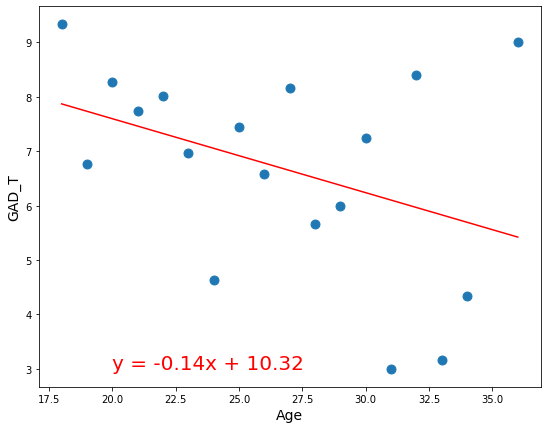

In [12]:
# General Anxiety Disorder (GAD) in Female 
female_age_series = mental_illness_in_female_df.index
female_nar_series = mental_illness_in_female_df["GAD_T"]
calculate_regression_plot_graph(female_age_series, female_nar_series, 20, 3)

## Conclusion:
### Based on the above scatter chart it is evident that General Anxiety Disorder (GAD) generally declines with age in Male and Female

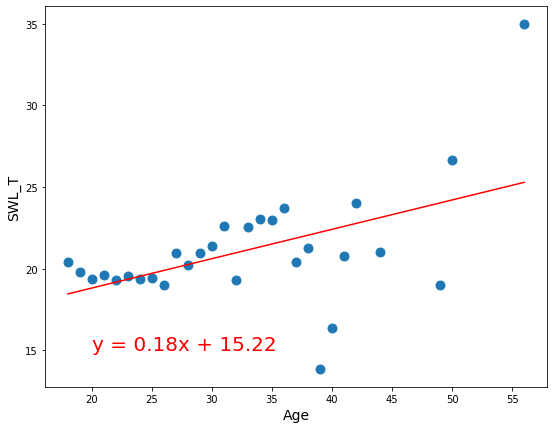

In [13]:
# Satisfaction With Life (SWL) in Male 
male_age_series = mental_illness_in_male_df.index
male_nar_series = mental_illness_in_male_df["SWL_T"]
calculate_regression_plot_graph(male_age_series, male_nar_series, 20, 15)

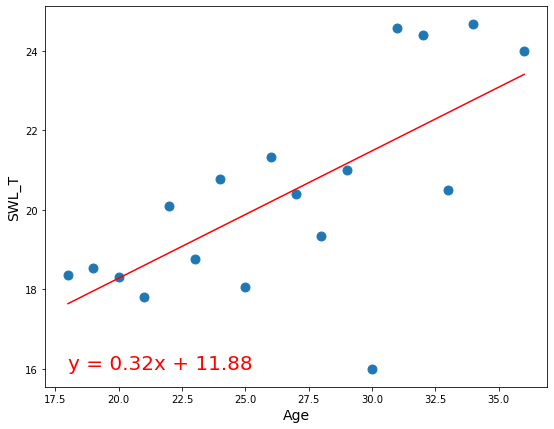

In [14]:
# Satisfaction With Life (SWL) in Female 
female_age_series = mental_illness_in_female_df.index
female_nar_series = mental_illness_in_female_df["SWL_T"]
calculate_regression_plot_graph(female_age_series, female_nar_series, 18, 16)

## Conclusion:
### Based on the above scatter chart it is evident that Satisfaction With Life (SWL) generally increases with age in Male and Female

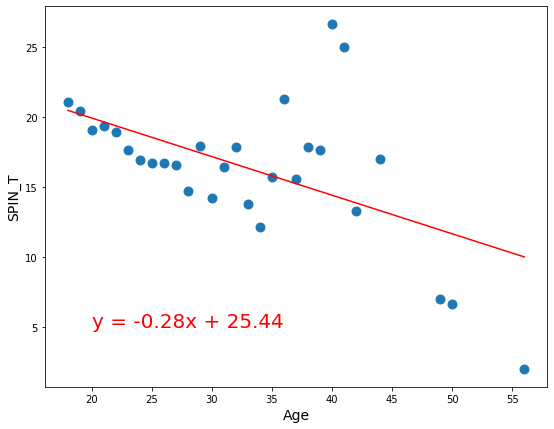

In [15]:
# Social Phobia Inventory (SPIN) in Male 
male_age_series = mental_illness_in_male_df.index
male_nar_series = mental_illness_in_male_df["SPIN_T"]
calculate_regression_plot_graph(male_age_series, male_nar_series, 20, 5)

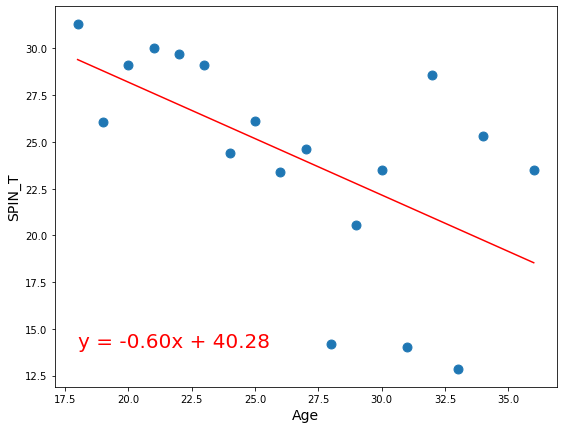

In [16]:
# Social Phobia Inventory (SPIN) in Female 
female_age_series = mental_illness_in_female_df.index
female_nar_series = mental_illness_in_female_df["SPIN_T"]
calculate_regression_plot_graph(female_age_series, female_nar_series, 18, 14)

## Conclusion:
### Based on the above scatter chart it is evident that Social Phobia Inventory (SPIN) generally declines with age in Male and Female

## Observations:
- There is no special distinction in Male vs Female in terms of Mental Illness due to gaming. They both showed the same pattern
- Hence it is concluded that the gaming affects Male and Female equally
- Based on this data we cannot conclude definitely if the mental illness is more prominent in Male or Female.